### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data set

In [2]:
data=pd.read_csv(r"D:\innotmatics\data.csv\data\demo_data\1.ushape.csv",header=None)

### Visualizing Data

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

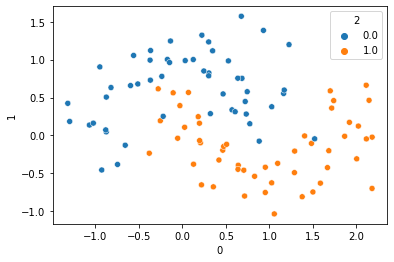

In [3]:
sns.scatterplot(data[0],data[1],hue=data[2])

#### By observing plot we can say that there are two class labels 
#### Distribution of class labels are u-shaped and inverted u-shaped

In [4]:
data[2].value_counts()

0.0    50
1.0    50
Name: 2, dtype: int64

#### Dataset is balanced and binary class dataset

#### Splitting Data into train and test

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.1,random_state=100)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
std=StandardScaler()

#### Standardizing the data using Standardscaler

In [9]:
stdd=pd.DataFrame(std.fit_transform(x_train))

#### Importing the Tensorflow,keras,sequential and layers

In [10]:
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

#### Defining a model and building a model

In [11]:
model=Sequential()
model.add(Dense(7,activation="relu",input_dim=2,kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(3,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))

#### model summary will explain no of trained parameters in model

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 21        
                                                                 
 dropout (Dropout)           (None, 7)                 0         
                                                                 
 batch_normalization (BatchN  (None, 7)                28        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 3)                 24        
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 batch_normalization_1 (Batc  (None, 3)                12        
 hNormalization)                                        

#### There are total of 89 parameters
#### 69 out of 89 parameters are trained parameters

#### Compiling a model using Adam as optimizer and binary_crossentropy as loss function

In [13]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

#### Trainnig the build model

In [14]:
save=model.fit(stdd,y_train,batch_size=10,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
8/8 [==============================] - 4s 74ms/step - loss: 0.7956 - accuracy: 0.5833 - val_loss: 0.6487 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 0s 15ms/step - loss: 0.8833 - accuracy: 0.4722 - val_loss: 0.6462 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 0s 15ms/step - loss: 0.8210 - accuracy: 0.5833 - val_loss: 0.6429 - val_accuracy: 0.5000
Epoch 4/20
8/8 [==============================] - 0s 13ms/step - loss: 0.8356 - accuracy: 0.5556 - val_loss: 0.6311 - val_accuracy: 0.5000
Epoch 5/20
8/8 [==============================] - 0s 12ms/step - loss: 0.6725 - accuracy: 0.6111 - val_loss: 0.6239 - val_accuracy: 0.6111
Epoch 6/20
8/8 [==============================] - 0s 10ms/step - loss: 0.8023 - accuracy: 0.5278 - val_loss: 0.6210 - val_accuracy: 0.5556
Epoch 7/20
8/8 [==============================] - 0s 9ms/step - loss: 0.7500 - accuracy: 0.5972 - val_loss: 0.6228 - val_accuracy: 0.5000
Epoch 8/20
8/8 [============

In [15]:
t1=save.history["loss"]
cv1=save.history["val_accuracy"]

#### Plotting the train error and cross-validation error

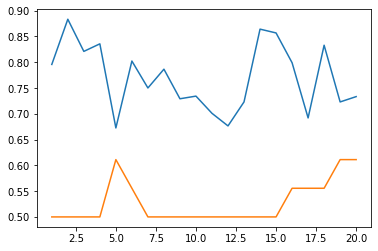

In [16]:
plt.plot(range(1,21),t1,label="training_loss")
plt.plot(range(1,21),cv1,label="cv_loss")

#### From the above plot we can observe that model is overfitting as train error and cross-validation error is high

#### predicting probabiloty of y values for stdd values

In [17]:
predi=model.predict(stdd)

3/3 [==============================] - 0s 9ms/step


#### converting probability values obtained from model.predict to class labels

In [170]:
predict=np.where(predi>0.5,1,0).flatten()

In [19]:
from sklearn.metrics import accuracy_score

#### calculating the accuracy

In [20]:
accuracy_score(y_train,predict)

0.7333333333333333

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

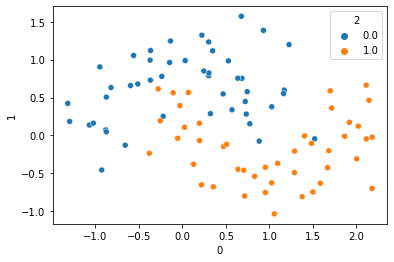

In [21]:
sns.scatterplot(x_train[0],x_train[1],hue=y_train)

In [22]:
from mlxtend.plotting import plot_decision_regions

#### Plotting the decision surface from using model

3888/3888 [==============================] - 7s 2ms/step


<AxesSubplot:>

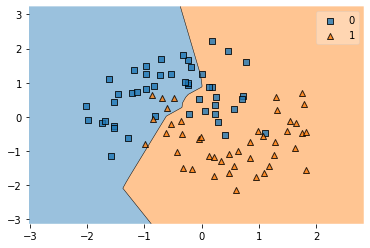

In [23]:
plot_decision_regions(stdd[[0,1]].values,y_train.values.astype(int),clf=model)

#### As I get the accuracy very low I build the new model with added hidden layers and added functions in each layer and repeat the whole process to get best model by observing accuracy

In [35]:
model1=Sequential()
model1.add(Dense(8,activation="relu",input_dim=2,kernel_initializer='he_uniform'))
model1.add(Dropout(0.5))
model1.add(BatchNormalization())
model1.add(Dense(6,activation="relu"))
model1.add(Dropout(0.5))
model1.add(BatchNormalization())
model1.add(Dense(4,activation="relu"))
model1.add(Dropout(0.5))
model1.add(BatchNormalization())
model1.add(Dense(1,activation="sigmoid"))

In [36]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 24        
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 batch_normalization_5 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 6)                 54        
                                                                 
 dropout_6 (Dropout)         (None, 6)                 0         
                                                                 
 batch_normalization_6 (Batc  (None, 6)                24        
 hNormalization)                                      

#### There are total of 89 parameters
#### 69 out of 89 parameters are trained parameters

#### Compiling a model using Adam as optimizer and binary_crossentropy as loss function

In [37]:
model1.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

#### Trainnig the build model

In [38]:
save=model1.fit(stdd,y_train,batch_size=10,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
8/8 [==============================] - 4s 60ms/step - loss: 0.8812 - accuracy: 0.4583 - val_loss: 0.7379 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 0s 12ms/step - loss: 0.9222 - accuracy: 0.5417 - val_loss: 0.7307 - val_accuracy: 0.5556
Epoch 3/20
8/8 [==============================] - 0s 10ms/step - loss: 0.8083 - accuracy: 0.5556 - val_loss: 0.7135 - val_accuracy: 0.5556
Epoch 4/20
8/8 [==============================] - 0s 12ms/step - loss: 0.8099 - accuracy: 0.5139 - val_loss: 0.7080 - val_accuracy: 0.5000
Epoch 5/20
8/8 [==============================] - 0s 9ms/step - loss: 0.9043 - accuracy: 0.4306 - val_loss: 0.7038 - val_accuracy: 0.6111
Epoch 6/20
8/8 [==============================] - 0s 11ms/step - loss: 0.8175 - accuracy: 0.5833 - val_loss: 0.7020 - val_accuracy: 0.6111
Epoch 7/20
8/8 [==============================] - 0s 15ms/step - loss: 0.8559 - accuracy: 0.5278 - val_loss: 0.7024 - val_accuracy: 0.5000
Epoch 8/20
8/8 [============

In [39]:
t1=save.history["loss"]
cv1=save.history["val_accuracy"]

#### Plotting the train error and cross-validation error

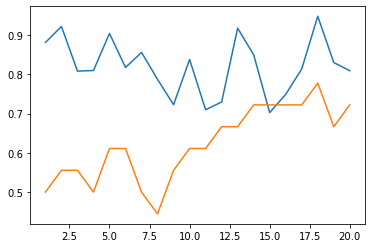

In [40]:
plt.plot(range(1,21),t1,label="training_loss")
plt.plot(range(1,21),cv1,label="cv_loss")

#### From the above plot we can observe that model is overfitting as train error and cross-validation error is high

#### predicting probabiloty of y values for stdd values

In [41]:
predi=model1.predict(stdd)

3/3 [==============================] - 0s 7ms/step


In [42]:
predict=np.where(predi>0.5,1,0).flatten()

#### calculating the accuracy

In [43]:
accuracy_score(y_train,predict)

0.7555555555555555

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

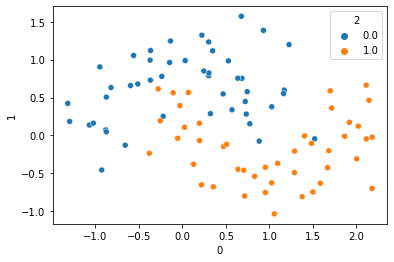

In [44]:
sns.scatterplot(x_train[0],x_train[1],hue=y_train)

#### Plotting the decision surface from using model

3888/3888 [==============================] - 8s 2ms/step


<AxesSubplot:>

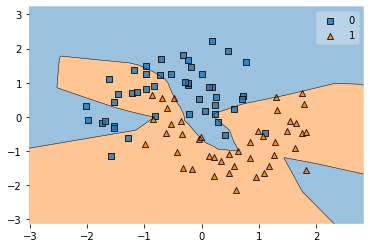

In [58]:
plot_decision_regions(stdd[[0,1]].values,y_train.values.astype(int),clf=model1)

#### As I get the accuracy very low but better than previous model 

#### Applying the model on test data to obtain the generalised accuracy

In [169]:
stddd=pd.DataFrame(std.transform(x_test))
predi=model1.predict(stddd)

1/1 [==============================] - 0s 61ms/step


#### converting probability values obtained from model.predict to class labels

In [171]:
predict=np.where(predi>0.5,1,0).flatten()

In [173]:
(accuracy_score(y_test,predict))

0.9

#### from the above cell we can observe that generalised accuracy is 90%